# A shared-reflector isomorphic Yagi

In [1]:
from isomorphic_yagis import differential_evolution, evaluate_antenna
from isomorphic_yagis.utils import BAND_WEIGHTS, BANDS, PARAMETER_LIMITS, plot_population, plot_results

In [2]:
# For a single reflector, we have to override the size of all reflectors to be the same
# Here, we're setting them all to whatever the 20m reflector is, arbitrarily
override_values = {f"reflector_length_{band}": "reflector_length_20" for band in BANDS}

# To allow the reflector a full range in parameter space, we have to override its limits
# Overriding is the last thing that happens when clipping an antenna to its limits, so
# we only have to override the size of the reflector we are setting all others to
parameter_limits = PARAMETER_LIMITS | {"reflector_length_20": (0.01, 0.99), "anchor_offset": (3, 20)}

# We want to really see something great on 20m and 15m, so we'll give it a higher weight
band_weights = BAND_WEIGHTS | {"20": 2, "15": 2}

In [3]:
# We'll run a differential evolution experiment with 500 antennas, 
# for 300 generations, with these parameter limits and override values
results = differential_evolution(
    n_population=500, 
    n_generations=300, 
    band_weights=band_weights,
    limits=parameter_limits, 
    override_values=override_values
)

2023-07-09 17:41:20,714	INFO worker.py:1636 -- Started a local Ray instance.
100%|██████████| 300/300 [2:14:28<00:00, 26.89s/it]  


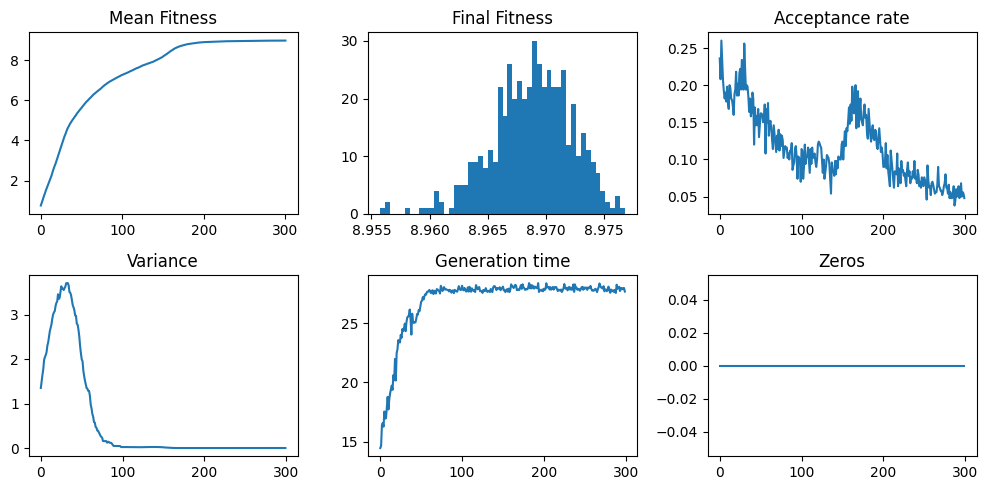

In [4]:
# How'd our experiment go ?
antennas, best_antenna = plot_results(results)

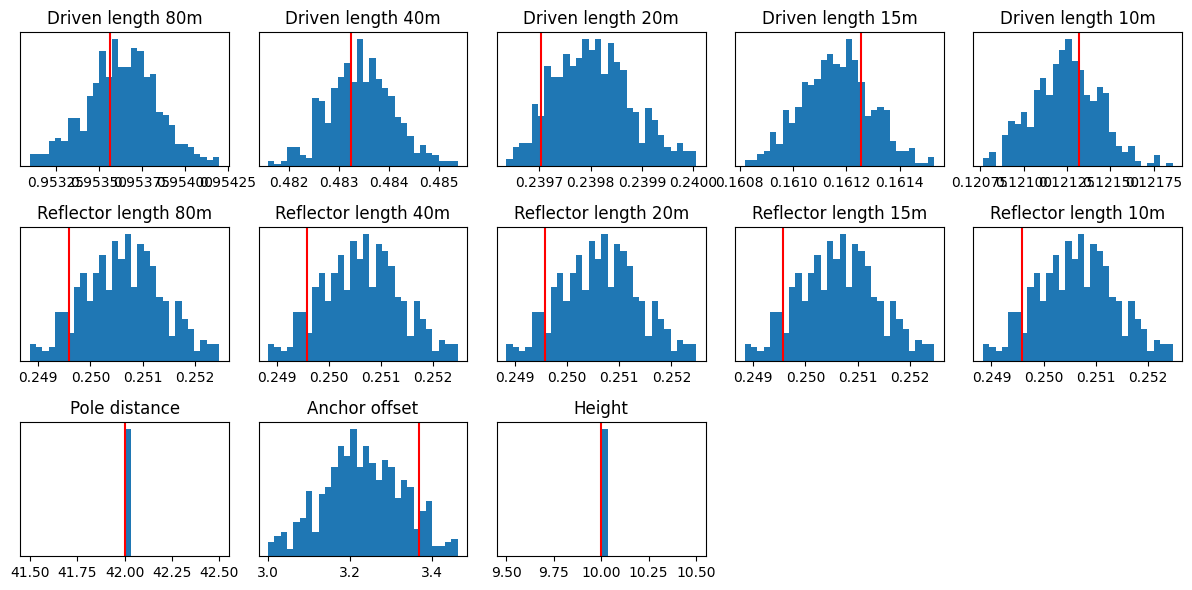

In [5]:
# What does the final antenna population look like ?
plot_population(antennas, results["fitness"])

In [8]:
# Which is our best antenna ?
best_antenna

{'driven_length_80': 0.9535634536770257,
 'reflector_length_80': 0.24958027559359486,
 'driven_length_40': 0.48322435251289714,
 'reflector_length_40': 0.24958027559359486,
 'driven_length_20': 0.23970310869274966,
 'reflector_length_20': 0.24958027559359486,
 'driven_length_15': 0.16125273226723436,
 'reflector_length_15': 0.24958027559359486,
 'driven_length_10': 0.12131784320104363,
 'reflector_length_10': 0.24958027559359486,
 'anchor_offset': 3.3669221578910173,
 'pole_distance': 42.0,
 'height': 10.0}

In [9]:
# How does it perform on various bands ?
evaluate_antenna(best_antenna, band_weights=band_weights, write=True)

{'80': {'gain': 5.914724,
  'swr': 1.0173369052441414,
  'score': 5.813928472967938},
 '40': {'gain': 6.051394,
  'swr': 1.590811238773697,
  'score': 3.803967342262943},
 '20': {'gain': 10.708067,
  'swr': 1.0000980494918368,
  'score': 21.414034364812355},
 '15': {'gain': 8.487644,
  'swr': 1.440954776713625,
  'score': 11.78058345364274},
 '10': {'gain': 7.825385,
  'swr': 1.6254692930994599,
  'score': 4.814231208931965}}